# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [89]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [90]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [91]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

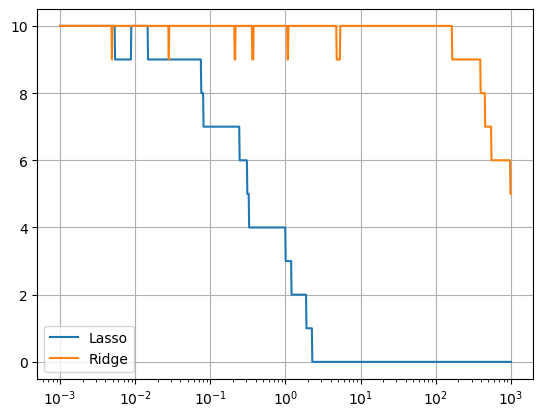

In [92]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
alp = np.logspace(-3, 3, num = 1000, base = 10.0)
x = []
y1 = []
y2 = []
for a in alp:
    x.append(a)
    
    regL = Lasso(alpha = a)
    regL.fit(X_train, y_train)
    y1.append(np.sum(abs(regL.coef_) > 0.5))

    regR = Ridge(alpha = a)
    regR.fit(X_train, y_train)
    y2.append(np.sum(abs(regR.coef_) > 0.5))
plt.xscale('log')
plt.plot(x, y1, label='Lasso')
plt.plot(x, y2 ,label='Ridge')
plt.legend()
plt.grid()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [93]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2

regR = Ridge()
regR.fit(X_train, y_train)
pred = regR.predict(X_test)

rmse = np.sqrt(MSE(y_test,pred))
mae = MAE(y_test, pred)
r2 = R2(y_test, pred)

print(f'RMSE : {rmse}')
print(f'MAE : {mae}')
print(f'R2 : {r2}')

RMSE : 58.304295113912275
MAE : 49.602750809651916
R2 : 0.359902022000946


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

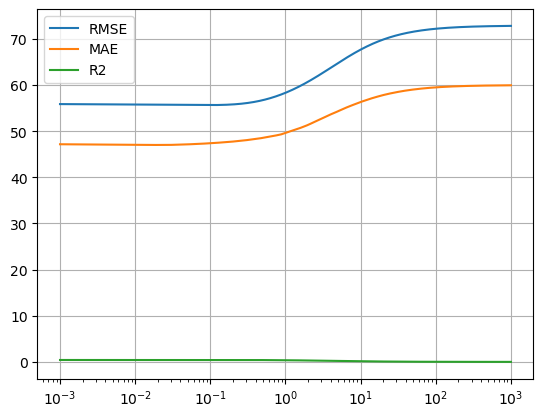

In [94]:
alp = np.logspace(-3, 3, num = 1000, base = 10.0)
x = []
y1 = []
y2 = []
y3 = []
for a in alp:
    x.append(a)
    
    regR = Ridge(alpha = a)
    regR.fit(X_train, y_train)
    pred = regR.predict(X_test)
    rmse = np.sqrt(MSE(y_test,pred))
    mae = MAE(y_test, pred)
    r2 = R2(y_test, pred)
    y1.append(rmse)
    y2.append(mae)
    y3.append(r2)
plt.xscale('log')
plt.plot(x, y1, label='RMSE')
plt.plot(x, y2, label='MAE')
plt.plot(x, y3, label='R2')
plt.legend()
plt.grid()

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

(array([179.,  54.,  31.,  18.,  11.,   8.,   5.,   1.,   1.,   1.]),
 array([4.37054766e-02, 5.88458919e+03, 1.17691347e+04, 1.76536802e+04,
        2.35382257e+04, 2.94227711e+04, 3.53073166e+04, 4.11918621e+04,
        4.70764076e+04, 5.29609531e+04, 5.88454986e+04]),
 <BarContainer object of 10 artists>)

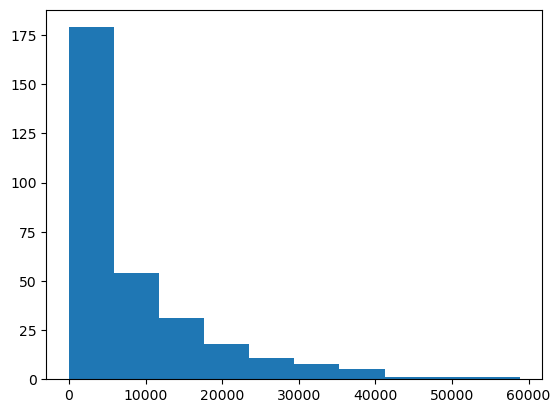

In [95]:
from sklearn.metrics import classification_report
mse = []
regR = Ridge(alpha = 0.5)
regR.fit(X_train, y_train)
pred = regR.predict(X_train)
for i in range(len(y_train)):
    mse.append((pred[i] - data.target[i]) ** 2)
plt.hist(mse)

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [96]:
from scipy import stats
regR = Ridge(alpha = 0.5)
regR.fit(X_train, y_train)
pred = regR.predict(X_test)
rmse = np.sqrt(MSE(y_test,pred))
mae = MAE(y_test, pred)
r2 = R2(y_test, pred)
print(f"RMSE before: {rmse}")
print(f"MAE before: {mae}")
print(f"R2 before: {r2}")
data = load_diabetes()
X = np.asarray(data.data)
Y = np.asarray(data.target)
Y = Y[(np.abs(stats.zscore(X.data)) < 3).all(axis=1)]
X = X[(np.abs(stats.zscore(X.data)) < 3).all(axis=1)]
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=241)
regR = Ridge(alpha = 0.5)
regR.fit(X_train, y_train)
pred = regR.predict(X_test)
rmse = np.sqrt(MSE(y_test,pred))
mae = MAE(y_test, pred)
r2 = R2(y_test, pred)
print(f"RMSE after: {rmse}")
print(f"MAE after: {mae}")
print(f"R2 after: {r2}")

RMSE before: 56.71547130165031
MAE before: 48.54376791169203
R2 before: 0.39431272762516034
RMSE after: 53.467647251423685
MAE after: 45.624804632860375
R2 after: 0.45329890190701383


__Задание 3.__ Отчёт

**(2 балла)**

__To Sum Up:__
1. Научился более-менее тюнить линейную регрессию
   1. Подбирать оптимальные гиперпараметры (тут alpha для Ridge()) с _помощью графика_ (очев, что для долгообучающихся моделей не спасёт)
   1. Выкидывать выбросы более __быстро и удобно__
2. Понял, какие _функции ошибок юзаются_ для лин рега
3. Находить выбросы по гистограмме